# Ridge Regression

### We implement a stochastic gradient descent algorithm for Ridge Regression from scratch

In [1]:
import numpy as np

class RidgeRegressionGD:
    def __init__(self, eta=0.01, lambda_=0.1, max_iter=1000, epsilon=1e-6, stochastic=False, batch_size=1, random_state=None):
        """
        Ridge Regression using Gradient Descent.

        Parameters:
        - eta: Learning rate.
        - lambda_: Regularization parameter.
        - max_iter: Maximum number of iterations.
        - epsilon: Convergence threshold.
        - stochastic: Boolean flag to use stochastic gradient descent.
        - batch_size: Size of the mini-batch for stochastic gradient descent.
        - random_state: Seed for random number generator (used in SGD).
        """
        self.eta = eta
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.stochastic = stochastic
        self.batch_size = batch_size
        self.random_state = random_state
        self.w_ = None
    
    def fit(self, X, y):
        """
        Fit the Ridge Regression model.

        Parameters:
        - X: Feature matrix (numpy array), shape (n_samples, n_features).
        - y: Target vector (numpy array), shape (n_samples,).
        """
        n_samples, n_features = X.shape
        # Initialize weights
        self.w_ = np.zeros(n_features)
        # Random number generator for SGD
        RNG = np.random.default_rng(self.random_state)

        for iteration in range(self.max_iter):
            # Gradient computation
            if self.stochastic:
                # Stochastic Gradient Descent (SGD)
                indices = RNG.choice(n_samples, size=self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y[indices]
                gradient = (-1 / self.batch_size) * X_batch.T.dot(y_batch - X_batch.dot(self.w_)) + self.lambda_ * self.w_
            else:
                # Batch Gradient Descent (BGD)
                gradient = (-1 / n_samples) * X.T.dot(y - X.dot(self.w_)) + self.lambda_ * self.w_

            # Update weights
            w_old = self.w_.copy()
            self.w_ -= self.eta * gradient

            # Check for convergence
            if np.linalg.norm(self.w_ - w_old) < self.epsilon:
                print(f"Convergence reached after {iteration + 1} iterations.")
                break

    def predict(self, X):
        """
        Predict using the Ridge Regression model.

        Parameters:
        - X: Feature matrix (numpy array), shape (n_samples, n_features).

        Returns:
        - Predictions (numpy array), shape (n_samples,).
        """
        return X.dot(self.w_)

### Next we study the effect of the L2-regularization on the training and testing errors, using the synthetic data generator from Activity 2.3. i.e., where data is generated according to
### X ∼ Uniform(−0.3, 0.3)
### Y = cos(3πx)/2 + 3x   + ϵ
### ϵ ∼ N(0, 0.1)
### We consider the ridge regression model for each λ in {10−10+9i/100, . . . , 10−1 : 0 ≤ i ≤ 100} by creating a pipeline of the implemented ridge regressor with a polynomial feature transformer with degree 5.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Synthetic Data
def generate_synthetic_data(n_samples=100, random_state=None):
    np.random.seed(random_state)  
    X = np.random.uniform(-0.3, 0.3, n_samples).reshape(-1, 1)  
    epsilon = np.random.normal(0, 0.1, n_samples)  
    y = (np.cos(3 * np.pi * X).ravel() / 2) + 3 * X.ravel() + epsilon  
    return X, y

# Polynomial Feature Transformation
def polynomial_transform(X, degree=5):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

# Ridge Regression Model (Gradient Descent)
class RidgeRegressionGD:
    def __init__(self, eta=0.01, lambda_=0.1, max_iter=1000, epsilon=1e-6):
        self.eta = eta
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.epsilon = epsilon
        self.w = None  # Weights
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)  # Initialize weights
        
        for _ in range(self.max_iter):
            gradient = (-2 / n_samples) * X.T @ (y - X @ self.w) + 2 * self.lambda_ * self.w
            new_w = self.w - self.eta * gradient
            
            # Check for convergence
            if np.linalg.norm(new_w - self.w, ord=2) < self.epsilon:
                break
            
            self.w = new_w
    
    def predict(self, X):
        return X @ self.w

# Create Range of Lambda Values
lambda_values = [10**(-10 + 9*i/100) for i in range(101)]

# Evaluate Ridge Regression
def evaluate_ridge_regression(X_train, y_train, X_test, y_test, lambda_values):
    train_errors = []
    test_errors = []

    for lambda_ in lambda_values:
        ridge_reg = RidgeRegressionGD(eta=0.01, lambda_=lambda_, max_iter=1000, epsilon=1e-6)
        ridge_reg.fit(X_train, y_train)

        y_train_pred = ridge_reg.predict(X_train)
        y_test_pred = ridge_reg.predict(X_test)

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    return train_errors, test_errors

# **FIX: Generate and split the data first**
X, y = generate_synthetic_data(n_samples=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data with polynomial features
X_train_poly = polynomial_transform(X_train, degree=5)
X_test_poly = polynomial_transform(X_test, degree=5)

# Evaluate Ridge Regression for different lambda values
train_errors, test_errors = evaluate_ridge_regression(X_train_poly, y_train, X_test_poly, y_test, lambda_values)


### We fit each model at least ten times for all choices of λ. To reduce the variance of the experiment we make sure that for each repetition all models use the same training dataset.

In [8]:
# Generate synthetic data
X, y = generate_synthetic_data(n_samples=100, random_state=42)

# Repeat the process at least 10 times
n_repetitions = 10
repetition_train_errors = []
repetition_test_errors = []

for _ in range(n_repetitions):
    # Resample a training dataset of size 20
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=20, random_state=None)

    # Transform data with polynomial features of degree 5
    X_train_poly = polynomial_transform(X_train, degree=5)
    X_test_poly = polynomial_transform(X_test, degree=5)

    # Evaluate Ridge Regression for different lambda values
    train_errors, test_errors = evaluate_ridge_regression(X_train_poly, y_train, X_test_poly, y_test, lambda_values)

    # Store errors
    repetition_train_errors.append(train_errors)
    repetition_test_errors.append(test_errors)

# Compute average errors across repetitions
mean_train_errors = np.mean(repetition_train_errors, axis=0)
mean_test_errors = np.mean(repetition_test_errors, axis=0)
std_train_errors = np.std(repetition_train_errors, axis=0)
std_test_errors = np.std(repetition_test_errors, axis=0)

### We create a plot of mean squared errors, where the x-axis is log lambda and y-axis is the log mean squared error.

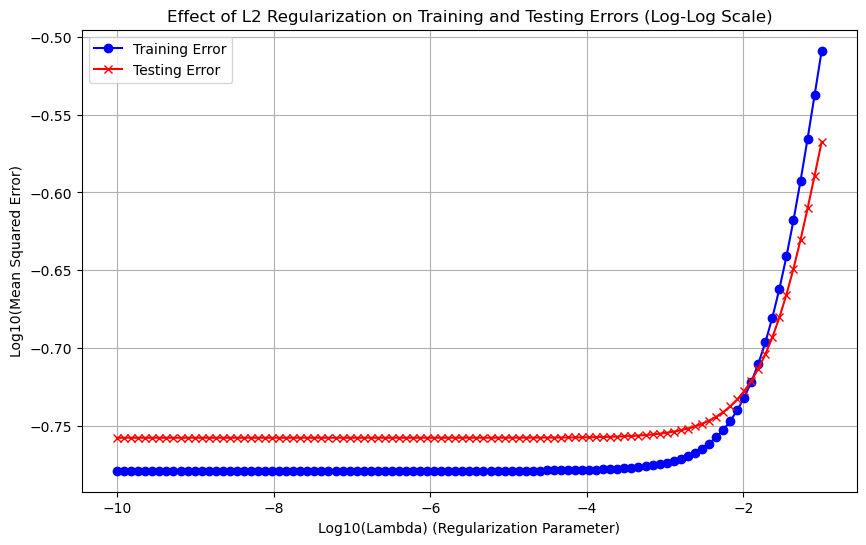

In [9]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambda_values), np.log10(train_errors), label='Training Error', color='blue', marker='o')
plt.plot(np.log10(lambda_values), np.log10(test_errors), label='Testing Error', color='red', marker='x')
plt.xlabel('Log10(Lambda) (Regularization Parameter)')
plt.ylabel('Log10(Mean Squared Error)')
plt.title('Effect of L2 Regularization on Training and Testing Errors (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

#### 1. Effect of λ on Model Complexity:
    - The parameter λ controls the strength of the L2 regularization. As increases, the regularization strength increases, leading to simpler models with fewer weights.
    - Conversely, as λ approaches 0 (on the left side of the plot), the model complexity increases, allowing the model to fit the training data more closely.

#### 2. Regions of Overfitting and Underfitting:
    - Overfitting Region: When λ is very small (close to 10^−10), there is almost no regularization. The model has high complexity and can fit the noise in the training data, resulting in a low training error but a relatively higher testing error. This is an overfitting scenario.
    - Underfitting Region: When λ is very large (close to 10^−10), the model becomes too simple (high regularization), leading to both high training and testing errors. This is an underfitting scenario because the model cannot capture the underlying patterns in the data.
    
#### 3. Optimal Regularization Parameter (λ):
    - The optimal λ value is the point where the test error is minimized. In the plot, the lowest test error appears when λ is around 10^−4 to 10^−3. At this point, the model achieves a balance between bias and variance, avoiding both underfitting and overfitting.

#### 4. Training and Testing Error Behavior:
    - Training Error: As λ increases, the training error increases gradually because the model becomes more regularized and constrained, reducing its ability to fit the training data perfectly.
    - Testing Error: The testing error initially decreases as λ increases from very small values (reducing overfitting), reaches a minimum point (optimal regularization), and then increases again as λ becomes too large (leading to underfitting).
    
#### 5. Implications for Model Selection:
    - Selecting an appropriate λ value is crucial for controlling the complexity of the model and ensuring good generalization performance. Using cross-validation is an effective way to identify the best λ value that minimizes the test error and provides the best balance between bias and variance.
    
#### Conclusion
    From the plot, it is clear that:

    - A very small λ (left side) leads to overfitting, where the model is too complex.
    - A very large λ (right side) leads to underfitting, where the model is too simple.
    - There is an intermediate range of λ values where the model performs optimally, achieving the best generalization performance on unseen data. This is the ideal region for selecting λ.